## Business Understanding
An insurance company offers different types of coverage to its customers. It offers bundle
packages, which provides multiple coverage with savings to customers while the company
increases customer retention and revenue. A model that predicts whether a customer would be
interested in additional coverage is valuable information. This information could enable the
company to target the customers that are interested in additional coverage based on
demographics, optimizing its business model in terms of customer retention and revenue.
## Project Goals
In order to capture the customers’ needs, the insurance company must be able to categorize the customers and determine the type of coverage they may be interested in. The company is planning to expand its offerings to its existing health insurance policyholders, and it must determine if the customer would be interested in car insurance so that they can accordingly plan communication strategy to reach out to those customers and optimize the business model.
<br/>Research Questions:
<br/>•	What are the demographics of the interested customers?
<br/>•	What are the major features that make a health insurance customer interested with vehicle insurance?
<br/>•	What's the best machine Learning modeling for this Cross Sell case?


In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('M:/Stevens/FE 582/Project/Final Results/train.csv')

In [3]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


The average customers vintage (numbers of day been insured in the compant is 154 days). <br />
No customers in this data set have been with the insurance company for 1 full year. <br />
The oldest customers in this dataset is 85 while the median is 36.  <br />
The most expensive annual premium is almost 17 times more expensive compared to the median annual premium.

In [6]:
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Checking Missing values

In [7]:
df.isna().sum()
## apparently there is no null value in all the rows and columns so we dont need to do anything about it for now 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Exploratory Data Analysis

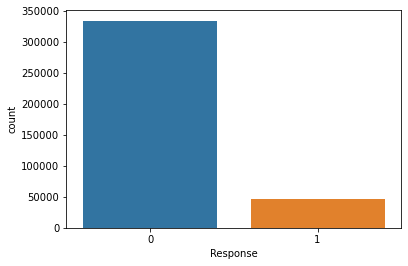

In [8]:
%%capture --no-display
sns.countplot(df.Response);

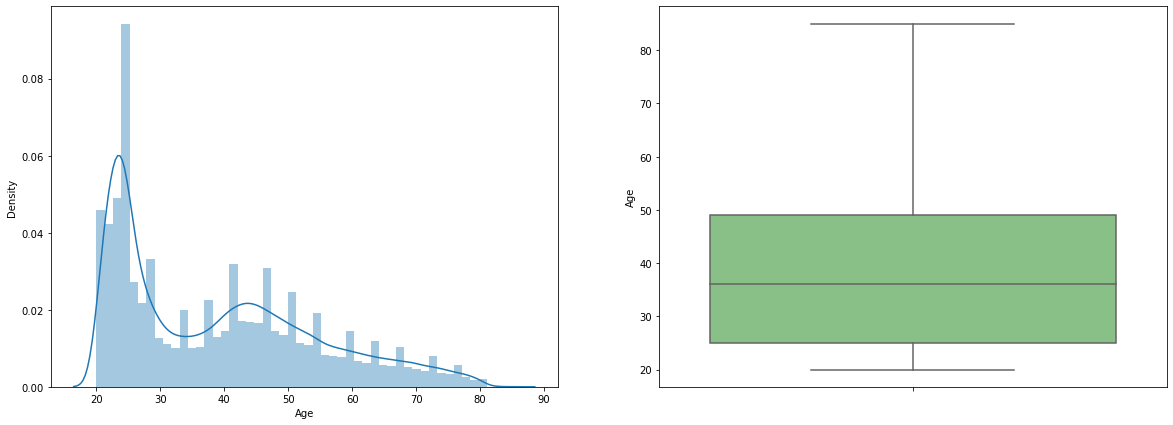

In [9]:
%%capture --no-display
plt.figure(figsize = [20, 7]) 
plt.subplot(1, 2, 1) 
sns.distplot(df.Age)
plt.subplot(1, 2, 2) 
sns.boxplot(y = 'Age', data = df, palette='Accent');

In [10]:
df['Age'].mean()


38.822583565331705

The average age for health insurance customers is around 38 - 39

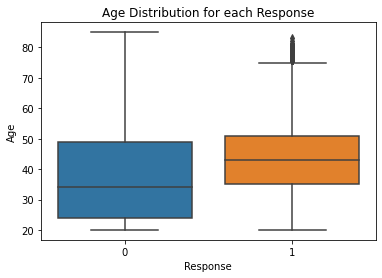

In [11]:
b = sns.boxplot(y='Age', x='Response', data=df)
b.set_title("Age Distribution for each Response");

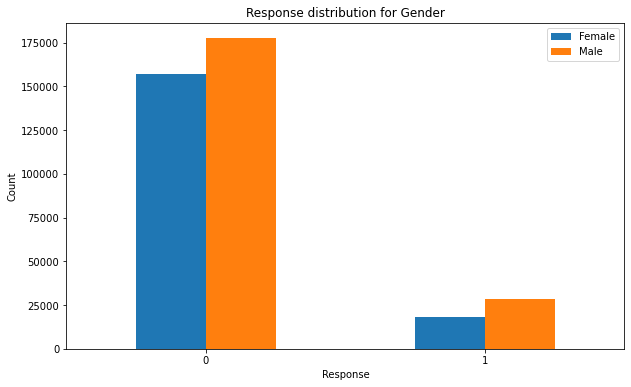

In [12]:
pd.crosstab(df['Response'], df['Gender']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution for Gender")
plt.xlabel("Response")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')


Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


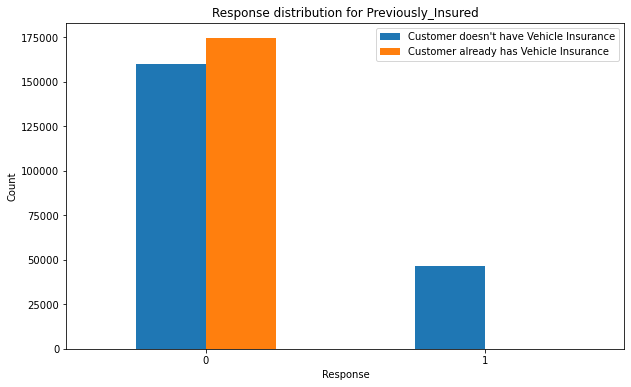

In [14]:
pd.crosstab(df['Response'], df['Previously_Insured']).plot(kind="bar", figsize=(10,6))
plt.title("Response distribution for Previously_Insured")
plt.xlabel("Response")
plt.ylabel("Count")
plt.legend(["Customer doesn't have Vehicle Insurance", "Customer already has Vehicle Insurance"])
plt.xticks(rotation=0);

In [15]:
df.drop(columns = 'id', inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Correlation Matrix

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


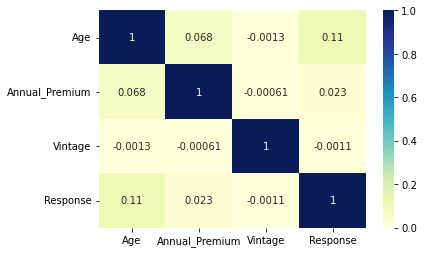

In [16]:
#correlation heatmap to check top features
new_df = df.copy(deep=True)
print(new_df.columns)
new_df = new_df.drop(columns = (['Gender','Previously_Insured','Region_Code','Vehicle_Damage','Region_Code','Driving_License','Policy_Sales_Channel']), axis=1)
corrmat = new_df.corr()
plt.figure()
top_corr_features = corrmat.index
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu");

### Encoding categorical variables

In [17]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [18]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


In [19]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


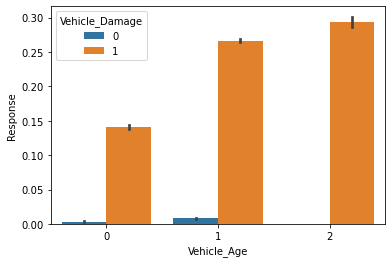

In [20]:
sns.barplot(x = df['Vehicle_Age'], y= df['Response'], hue = df['Vehicle_Damage'])

# Customer who has more than 2 years car age has a more likely to have vehicle damage and more likely to response to vehicle insurance
# Customer who has a vehicle damage are more like to response to Insurance as well

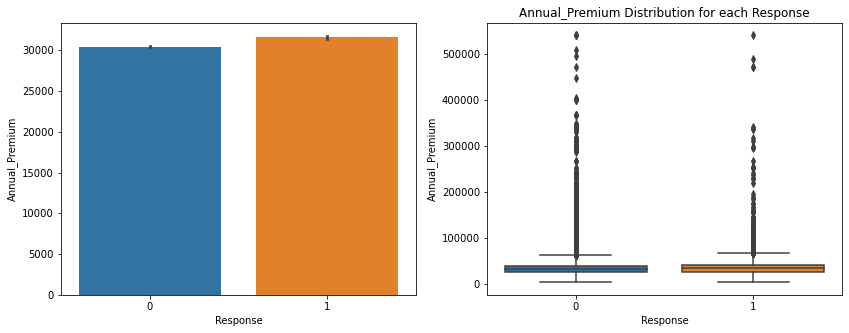

In [21]:
plt.figure(figsize = [14, 5]) 
plt.subplot(1, 2, 1) 
sns.barplot(x = 'Response', y ='Annual_Premium', data = df)
plt.subplot(1, 2, 2)
b = sns.boxplot(y='Annual_Premium', x='Response', data=df)
b.set_title("Annual_Premium Distribution for each Response");

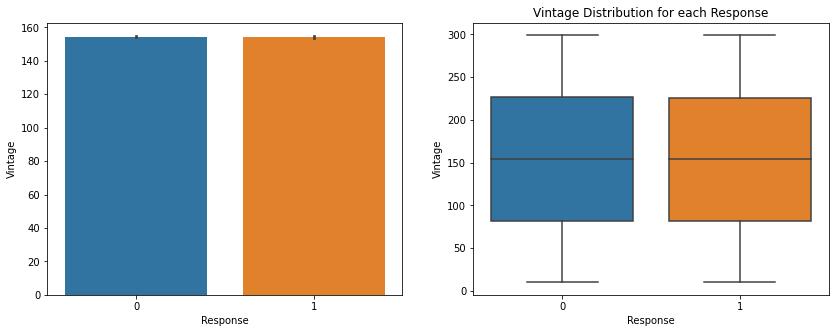

In [22]:
plt.figure(figsize = [14, 5]) 
plt.subplot(1, 2, 1) 
sns.barplot(x = 'Response', y ='Vintage', data = df)
plt.subplot(1, 2, 2)
b = sns.boxplot(y='Vintage', x='Response', data=df)
b.set_title("Vintage Distribution for each Response");

No significant difference observed between the interested and not interested customers with respect to Vintage so dropping this feature in the further analysis. 

In [23]:
top_5_region =  pd.crosstab(index = df['Region_Code'], columns = df['Response']).sort_values(1, ascending = False).head()
top_5_region


Response,0,1
Region_Code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


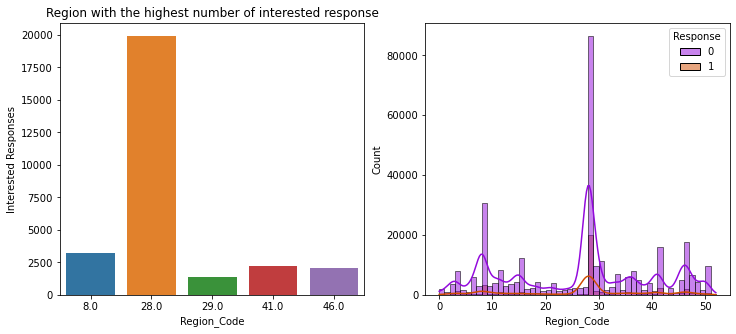

In [24]:
plt.figure(figsize = [12, 5]) 
plt.subplot(1, 2, 1) 
sns.barplot(x = top_5_region.index, y = top_5_region[1])
plt.ylabel('Interested Responses')
plt.title('Region with the highest number of interested response')
plt.subplot(1, 2, 2) 
sns.histplot(data=df,x="Region_Code",palette='gnuplot',kde=True,hue="Response",binwidth=1);

Region code is randomly distributed, not significant enough so dropping this feature.

### Attribute Selection

In [25]:
X = df.drop(columns = ['Response', 'Region_Code', 'Policy_Sales_Channel', 'Vintage'])
Y = df['Response']

### Data Splitting

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

### Modeling

**Logistic Regression**

In [57]:
#Baseline model without SMOTE
#Logistic Regression with all variables
modellogg = LogisticRegression()
modellogg.fit(X_train, Y_train)

y_pred_logreg = modellogg.predict(X_test)

print(classification_report(Y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    100195
           1       0.35      0.04      0.08     14138

    accuracy                           0.87    114333
   macro avg       0.61      0.52      0.50    114333
weighted avg       0.81      0.87      0.83    114333



In [59]:
print(f'The accuracy score of Logistic Regression model is: {accuracy_score(Y_test, y_pred_logreg)}')
print(f'The recall score of Logistic Regression model is: {recall_score(Y_test, y_pred_logreg)}')


The accuracy score of Logistic Regression model is: 0.8715768850638048


### Handling Imbalance - Over Sampling using SMOTE

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 42)

In [28]:
X_train_os, Y_train_os = os.fit_resample(X_train, Y_train)

In [29]:
df_smote = pd.concat([X_train_os, Y_train_os], axis = 1)
df_smote['Response'].value_counts()


1    234204
0    234204
Name: Response, dtype: int64

After using SMOTE, the ratio of interested and not interested (Response 0 and 1) is 1:1 and we proceed towards modeling.

**Logistic Regression**

In [63]:
#Logistic Regression with all variables with SMOTE
modellog = LogisticRegression()
modellog.fit(X_train_os, Y_train_os)

y_pred_SMOTE_logreg = modellog.predict(X_test)

print(classification_report(Y_test, y_pred_SMOTE_logreg))


              precision    recall  f1-score   support

           0       0.97      0.69      0.81    100195
           1       0.28      0.85      0.42     14138

    accuracy                           0.71    114333
   macro avg       0.62      0.77      0.61    114333
weighted avg       0.89      0.71      0.76    114333



In [71]:
print(f'The accuracy score of Logistic Regression model with SMOTE is: {accuracy_score(Y_test, y_pred_SMOTE_logreg)}')
print(f'The recall score of Logistic Regression model with SMOTE is: {recall_score(Y_test, y_pred_SMOTE_logreg)}')
print(f'The roc_auc_score of Logistic Regression model with SMOTE is: {roc_auc_score(Y_test, y_pred_SMOTE_logreg)}')

The accuracy score of Logistic Regression model with SMOTE is: 0.7097076084769927
The recall score of Logistic Regression model with SMOTE is: 0.8524543782713255
The roc_auc_score of Logistic Regression model with SMOTE is: 0.7710098629217799


**Decision Tree Classifier**

In [65]:
modeldtc =DecisionTreeClassifier(random_state=42,max_depth=7)
modeldtc.fit(X_train_os, Y_train_os)

y_pred_SMOTE_dcf = modeldtc.predict(X_test)

print(classification_report(Y_test, y_pred_SMOTE_dcf))


              precision    recall  f1-score   support

           0       0.97      0.69      0.81    100195
           1       0.28      0.86      0.43     14138

    accuracy                           0.71    114333
   macro avg       0.63      0.78      0.62    114333
weighted avg       0.89      0.71      0.76    114333



In [72]:
print(f'The accuracy score of Decision Tree model is: {accuracy_score(Y_test, y_pred_SMOTE_dcf)}')
print(f'The recall score of Decision Tree model is: {recall_score(Y_test, y_pred_SMOTE_dcf)}')
print(f'The roc_auc_score of Decision Tree model with SMOTE is: {roc_auc_score(Y_test, y_pred_SMOTE_dcf)}')

The accuracy score of Decision Tree model is: 0.7145181181286243
The recall score of Decision Tree model is: 0.8642665157730938
The roc_auc_score of Decision Tree model with SMOTE is: 0.7788272046902796


**Random Forest Classifier**

In [40]:
# random_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,3,4,5,6,7,10],
#                'min_samples_leaf': [4, 6, 8],
#                'min_samples_split': [5, 7,10],
#                'n_estimators': [300]}

# clf = RandomForestClassifier()
# model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
#                                cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
# model.fit(X_train_os,Y_train_os)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [67]:
modelrf = RandomForestClassifier(random_state=42,max_depth= 6, criterion = 'gini',min_samples_split=5, n_estimators = 300)
modelrf.fit(X_train_os, Y_train_os)

y_pred_SMOTE_rf = modelrf.predict(X_test)

print(f'The accuracy score of Random Forest model is: {accuracy_score(Y_test, y_pred_SMOTE_rf)}')
print(f'The recall score of Random Forest model is: {recall_score(Y_test, y_pred_SMOTE_rf)}')


The accuracy score of Random Forest model is: 0.7022381989451865
The recall score of Random Forest model is: 0.9065638704201443


In [74]:
print(f'The roc_auc_score of Random Forest model with SMOTE is: {roc_auc_score(Y_test, y_pred_SMOTE_rf)}')

The roc_auc_score of Random Forest model with SMOTE is: 0.7899853635248583


In [68]:
#Classification Report
print (classification_report(Y_test, y_pred_SMOTE_rf))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    100195
           1       0.28      0.91      0.43     14138

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.61    114333
weighted avg       0.89      0.70      0.75    114333

